In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

import sklearn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.optimizers import SGD


from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler


**Heart Data**

In [33]:
file_path = "heart+disease/processed.cleveland.data"
column_names = ['age', 'sex', 'chest pain type','resting blood pressure' , 'cholesteral', 'fasting blood sugar < 120', 'resting ecg', 'max heart rate', 'exercise induced angina', 'oldpeak', 'slope', 'number of vessels colored', 'thal', 'class']
heart_data = pd.read_csv(file_path, delimiter=",", header=None, names=column_names)
# Class: 0 is healathy, 1-4 is disease
for i in range(len(heart_data)):
    if heart_data['class'].iloc[i] != 0:
        heart_data.loc[i, "class"] = 1
    else:
        continue

heart_data['number of vessels colored'] = pd.to_numeric(heart_data['number of vessels colored'], errors='coerce')
heart_data['thal'] = pd.to_numeric(heart_data['thal'], errors='coerce')

heart_data.dropna(inplace=True)
shuffled_heart_data = heart_data.sample(frac=1)
shuffled_heart_data.reset_index(inplace = True, drop = True)

TargetVal = ['class']
Features = ['age', 'sex', 'chest pain type','resting blood pressure' , 'cholesteral', 'fasting blood sugar < 120', 'resting ecg', 'max heart rate', 'exercise induced angina', 'oldpeak', 'slope', 'number of vessels colored', 'thal']

X = shuffled_heart_data[Features].values
Y = shuffled_heart_data[TargetVal].values

PredictorScaler=StandardScaler()
PredictorScalerFit=PredictorScaler.fit(X)

X=PredictorScalerFit.transform(X)

model = Sequential()
model.add(Dense(units=64, input_dim=13, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
def run_cross_validation(X, Y, kf_splits=3, epochs=100, batch_size=5):
    def create_model(input_dim):
        model = Sequential()
        model.add(Dense(units=64, input_dim=input_dim, kernel_initializer='uniform', activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
        model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
        model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
        return model

    # Initialize K-Fold cross-validation
    kf = KFold(n_splits=kf_splits, shuffle=True, random_state=42)
    
    fold_results = []
    
    # Perform K-Fold cross-validation
    for fold, (train_index, test_index) in enumerate(kf.split(X), start=1):
        print(f"\nFold {fold - 1}")
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]

        # Train the model
        classifier = create_model(X.shape[1])
        classifier.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0)

        # Predict on test data
        predictions = classifier.predict(X_test)
        predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy
        accuracy = np.mean(predictions == y_test)
        fold_results.append(accuracy)

        print(f"Accuracy for Fold {fold + 1}: {accuracy:.4f}")

        # Confusion Matrix
        cm = confusion_matrix(y_test, predictions)
        print(f"Confusion Matrix for Fold {fold + 1}:\n{cm}")
        print(classification_report(y_test, predictions))

        # Plot Confusion Matrix
        class_names = ['Class 0', 'Class 1']  # Adjust class names as per your dataset
        df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
        plt.figure(figsize=(8, 6))
        sn.heatmap(df_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.xlabel("Predicted Class")
        plt.ylabel("True Class")
        plt.title(f"Confusion Matrix - Fold {fold + 1}")
        plt.show()

    # Summary of results after all folds
    print("\nK-Fold Cross-Validation Results:")
    for fold, accuracy in enumerate(fold_results, 1):
        print(f"Fold {fold}: Accuracy = {accuracy:.4f}")

    print(f"\nAverage Accuracy: {np.mean(fold_results):.4f}")


20/80


Fold 0
1/1 [==============================] - 0s 78ms/step
Accuracy for Fold 2: 0.7500
Confusion Matrix for Fold 2:
[[8 2]
 [3 7]]
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.78      0.70      0.74        10

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.75      0.75      0.75        20



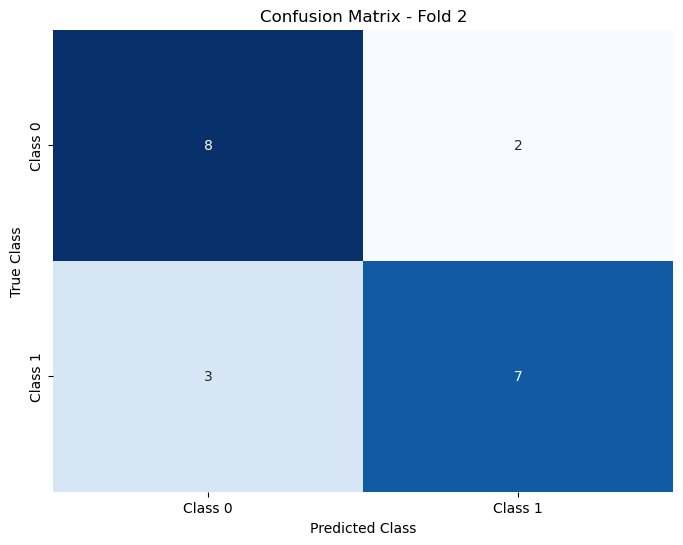


Fold 1
1/1 [==============================] - 0s 76ms/step
Accuracy for Fold 3: 0.6000
Confusion Matrix for Fold 3:
[[6 1]
 [7 6]]
              precision    recall  f1-score   support

           0       0.46      0.86      0.60         7
           1       0.86      0.46      0.60        13

    accuracy                           0.60        20
   macro avg       0.66      0.66      0.60        20
weighted avg       0.72      0.60      0.60        20



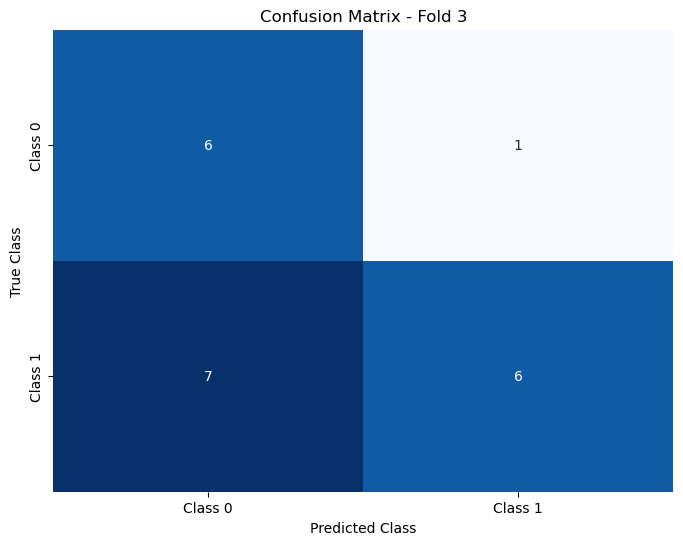


Fold 2
1/1 [==============================] - 0s 77ms/step
Accuracy for Fold 4: 0.7368
Confusion Matrix for Fold 4:
[[6 4]
 [1 8]]
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.67      0.89      0.76         9

    accuracy                           0.74        19
   macro avg       0.76      0.74      0.73        19
weighted avg       0.77      0.74      0.73        19



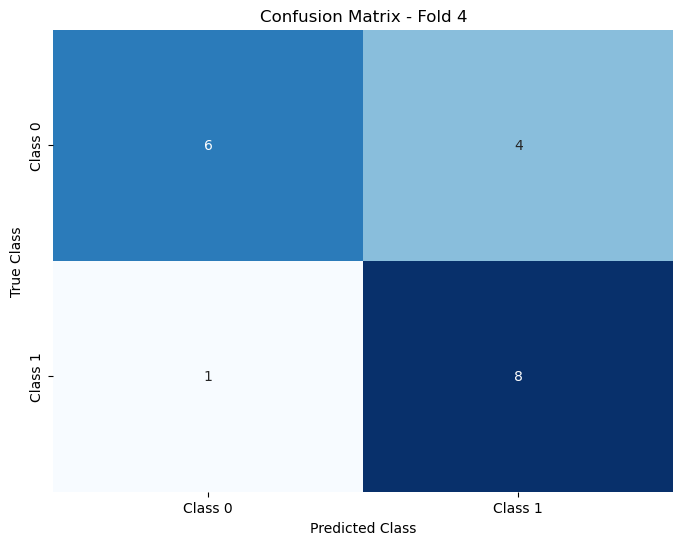


K-Fold Cross-Validation Results:
Fold 1: Accuracy = 0.7500
Fold 2: Accuracy = 0.6000
Fold 3: Accuracy = 0.7368

Average Accuracy: 0.6956


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)
run_cross_validation(X_train, y_train, kf_splits=3, epochs=100, batch_size=5)

50/50


Fold 0
2/2 [==============================] - 0s 2ms/step
Accuracy for Fold 2: 0.7800
Confusion Matrix for Fold 2:
[[18  5]
 [ 6 21]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.77        23
           1       0.81      0.78      0.79        27

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50



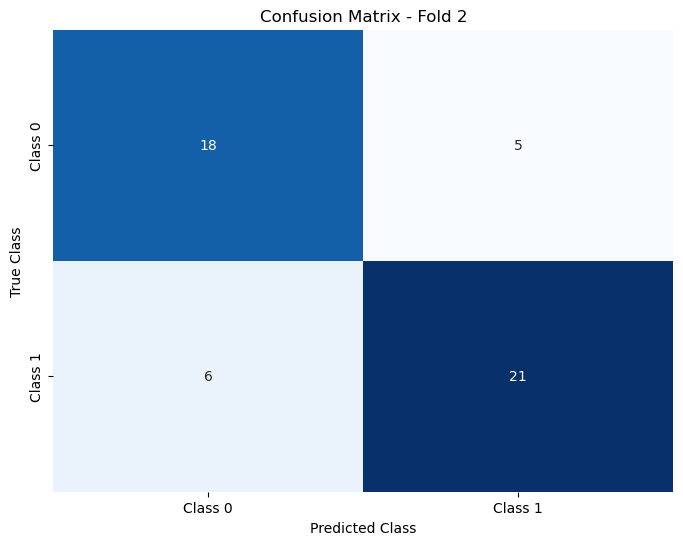


Fold 1
2/2 [==============================] - 0s 3ms/step
Accuracy for Fold 3: 0.7959
Confusion Matrix for Fold 3:
[[18  5]
 [ 5 21]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        23
           1       0.81      0.81      0.81        26

    accuracy                           0.80        49
   macro avg       0.80      0.80      0.80        49
weighted avg       0.80      0.80      0.80        49



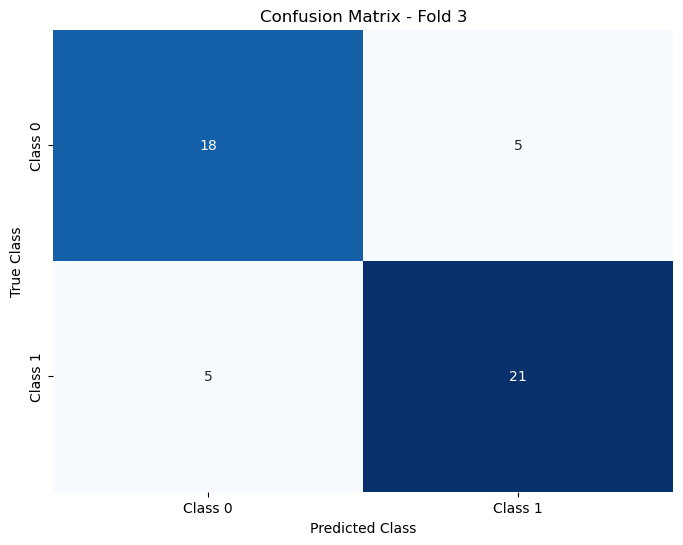


Fold 2
2/2 [==============================] - 0s 3ms/step
Accuracy for Fold 4: 0.7551
Confusion Matrix for Fold 4:
[[17  8]
 [ 4 20]]
              precision    recall  f1-score   support

           0       0.81      0.68      0.74        25
           1       0.71      0.83      0.77        24

    accuracy                           0.76        49
   macro avg       0.76      0.76      0.75        49
weighted avg       0.76      0.76      0.75        49



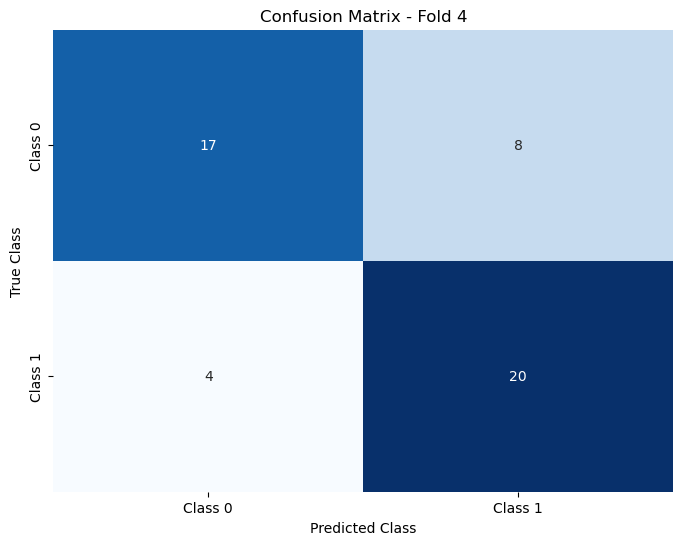


K-Fold Cross-Validation Results:
Fold 1: Accuracy = 0.7800
Fold 2: Accuracy = 0.7959
Fold 3: Accuracy = 0.7551

Average Accuracy: 0.7770


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
run_cross_validation(X_train, y_train, kf_splits=3, epochs=100, batch_size=5)

80/20


Fold 0
3/3 [==============================] - 0s 2ms/step
Accuracy for Fold 2: 0.8228
Confusion Matrix for Fold 2:
[[37 10]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        47
           1       0.74      0.88      0.80        32

    accuracy                           0.82        79
   macro avg       0.82      0.83      0.82        79
weighted avg       0.84      0.82      0.82        79



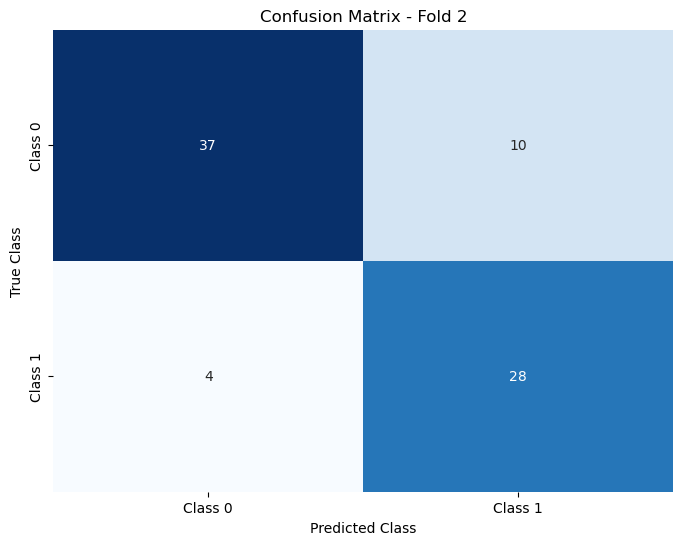


Fold 1
3/3 [==============================] - 0s 2ms/step
Accuracy for Fold 3: 0.7848
Confusion Matrix for Fold 3:
[[29  5]
 [12 33]]
              precision    recall  f1-score   support

           0       0.71      0.85      0.77        34
           1       0.87      0.73      0.80        45

    accuracy                           0.78        79
   macro avg       0.79      0.79      0.78        79
weighted avg       0.80      0.78      0.79        79



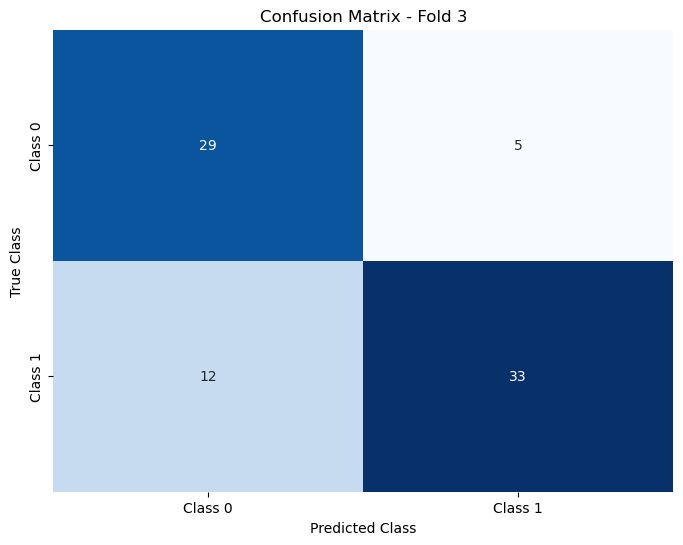


Fold 2
3/3 [==============================] - 0s 2ms/step
Accuracy for Fold 4: 0.7342
Confusion Matrix for Fold 4:
[[32 11]
 [10 26]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75        43
           1       0.70      0.72      0.71        36

    accuracy                           0.73        79
   macro avg       0.73      0.73      0.73        79
weighted avg       0.73      0.73      0.73        79



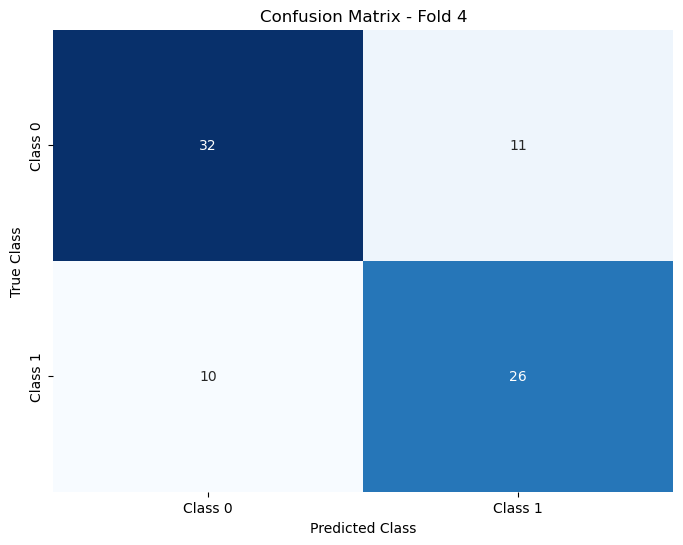


K-Fold Cross-Validation Results:
Fold 1: Accuracy = 0.8228
Fold 2: Accuracy = 0.7848
Fold 3: Accuracy = 0.7342

Average Accuracy: 0.7806


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
run_cross_validation(X_train, y_train, kf_splits=3, epochs=100, batch_size=5)

**Parkinsons Dataset**

In [55]:
file_path = "parkinsons/parkinsons.data"
parkin_data = pd.read_csv(file_path, delimiter=",", header=0)
parkin_data.drop(columns=parkin_data.columns[0], inplace=True)

parkin_data.dropna(inplace=True)

correlation_matrix = parkin_data.corr()

upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
parkin_data_reduced = parkin_data.drop(columns=to_drop)
shuffled_park_data = parkin_data_reduced.sample(frac=1)
shuffled_park_data.reset_index(inplace = True, drop = True)

TargetVal = ['status']
feat_list = list(parkin_data_reduced.columns)
feat_list.remove('status')
Features = feat_list
X = shuffled_park_data[Features].values
Y = shuffled_park_data[TargetVal].values

PredictorScaler=StandardScaler()
PredictorScalerFit=PredictorScaler.fit(X)
X=PredictorScalerFit.transform(X)

In [58]:

def run_cross_validation(X, Y, kf_splits=3, epochs=100, batch_size=5):
    def create_model():
        model = Sequential()
        model.add(Dense(units=64, input_dim=X.shape[1], kernel_initializer='uniform', activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
        model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
        model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
        return model

    # Initialize K-Fold cross-validation
    kf = KFold(n_splits=kf_splits, shuffle=True, random_state=42)
    
    fold_results = []
    
    # Perform K-Fold cross-validation
    for fold, (train_index, test_index) in enumerate(kf.split(X), start=1):
        print(f"\nFold {fold - 1}")
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]

        # Train the model
        classifier = create_model()
        classifier.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0)

        # Predict on test data
        predictions = classifier.predict(X_test)
        predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy
        accuracy = np.mean(predictions == y_test)
        fold_results.append(accuracy)

        print(f"Accuracy for Fold {fold + 1}: {accuracy:.4f}")

        # Confusion Matrix
        cm = confusion_matrix(y_test, predictions)
        unique_classes = np.unique(y_test)  # Get unique classes in the test set
        class_names = [f"Class {cls}" for cls in unique_classes]  # Generate class names dynamically
         # Adjust class names as per your dataset
        df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
        plt.figure(figsize=(8, 6))
        sn.heatmap(df_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.xlabel("Predicted Class")
        plt.ylabel("True Class")
        plt.title(f"Confusion Matrix - Fold {fold + 1}")
        plt.show()

    # Summary of results after all folds
    print("\nK-Fold Cross-Validation Results:")
    for fold, accuracy in enumerate(fold_results, 1):
        print(f"Fold {fold}: Accuracy = {accuracy:.4f}")

    print(f"\nAverage Accuracy: {np.mean(fold_results):.4f}")


20/80


Fold 0
1/1 [==============================] - 0s 75ms/step
Accuracy for Fold 2: 0.6923


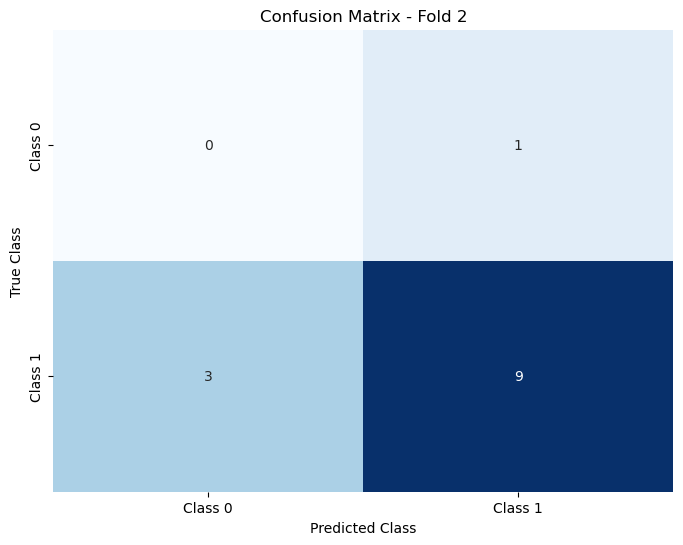


Fold 1
1/1 [==============================] - 0s 75ms/step
Accuracy for Fold 3: 0.6923


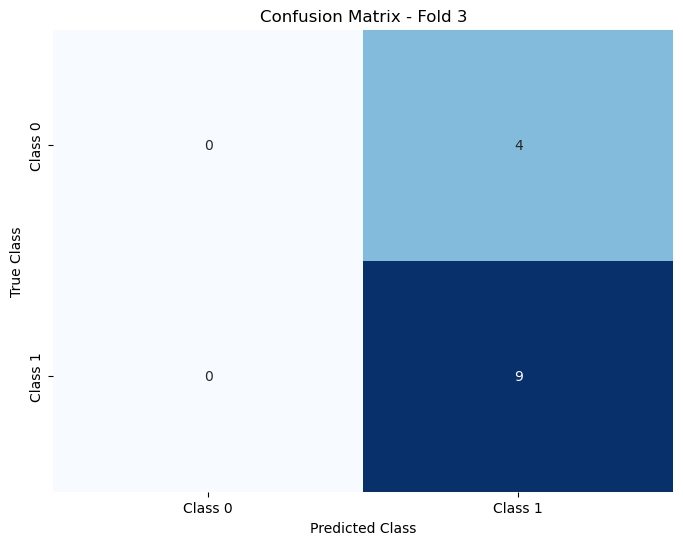


Fold 2
1/1 [==============================] - 0s 76ms/step
Accuracy for Fold 4: 0.8462


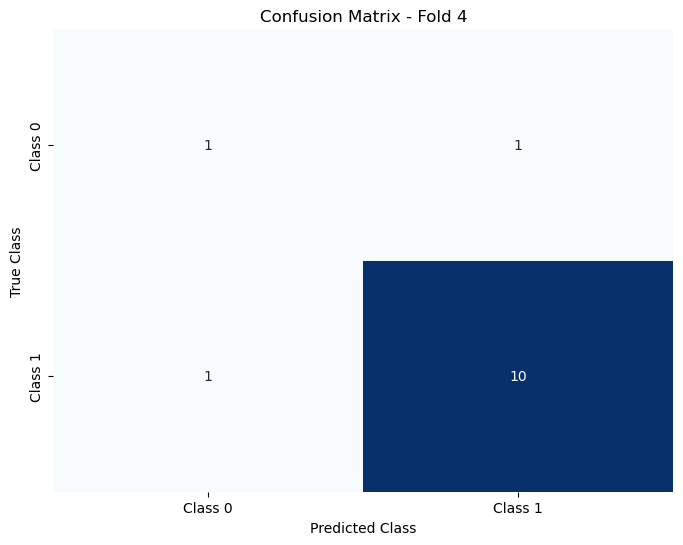


K-Fold Cross-Validation Results:
Fold 1: Accuracy = 0.6923
Fold 2: Accuracy = 0.6923
Fold 3: Accuracy = 0.8462

Average Accuracy: 0.7436


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)
run_cross_validation(X_train, y_train, kf_splits=3, epochs=100, batch_size=5)

50/50


Fold 0
2/2 [==============================] - 0s 3ms/step
Accuracy for Fold 2: 0.8182


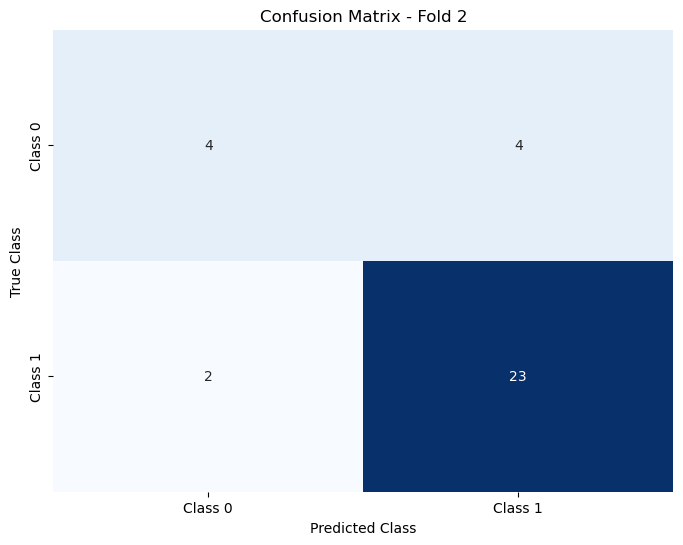


Fold 1
1/1 [==============================] - 0s 77ms/step
Accuracy for Fold 3: 0.9062


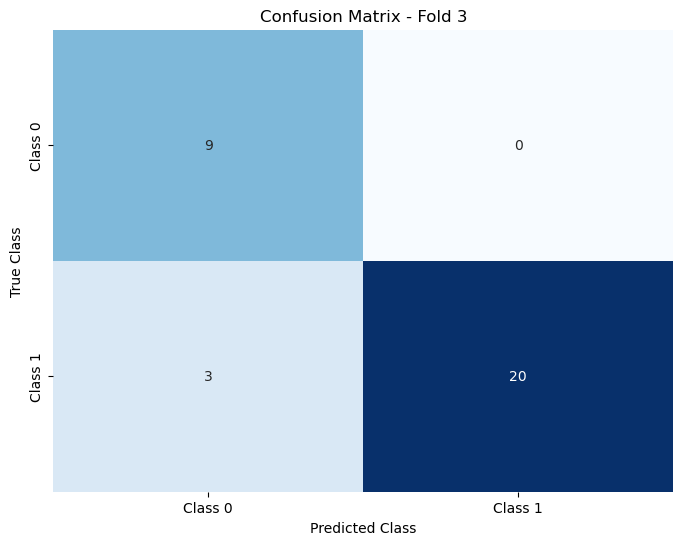


Fold 2
1/1 [==============================] - 0s 74ms/step
Accuracy for Fold 4: 0.8438


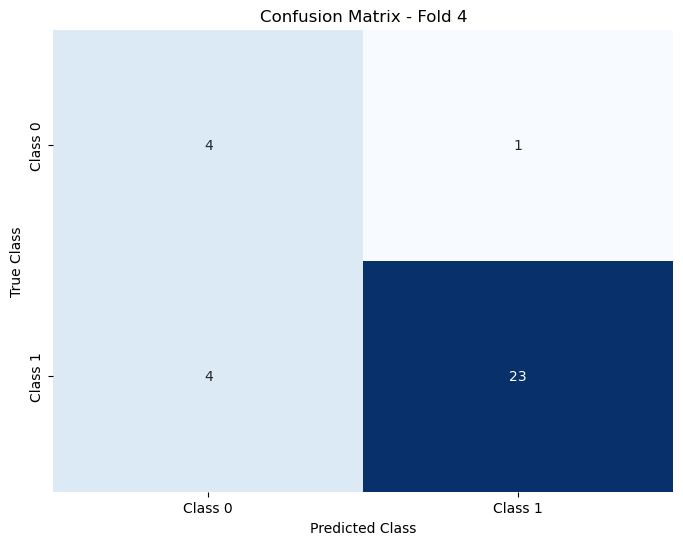


K-Fold Cross-Validation Results:
Fold 1: Accuracy = 0.8182
Fold 2: Accuracy = 0.9062
Fold 3: Accuracy = 0.8438

Average Accuracy: 0.8561


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
run_cross_validation(X_train, y_train, kf_splits=3, epochs=100, batch_size=5)

80/20


Fold 0
2/2 [==============================] - 0s 3ms/step
Accuracy for Fold 2: 0.9231


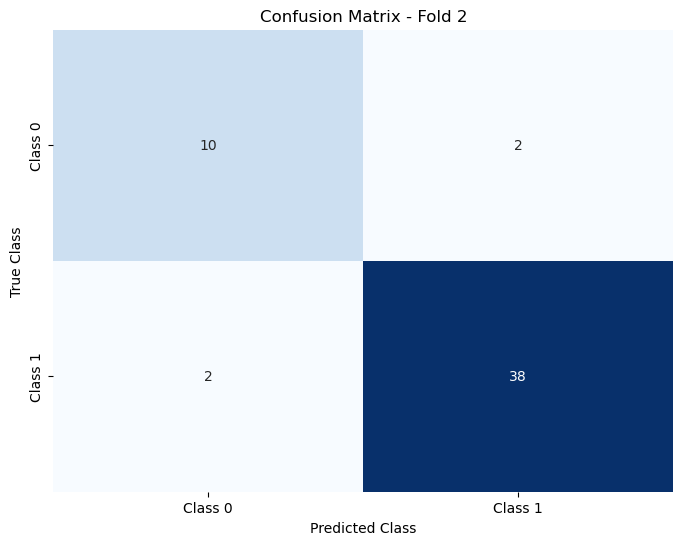


Fold 1
2/2 [==============================] - 0s 3ms/step
Accuracy for Fold 3: 0.9423


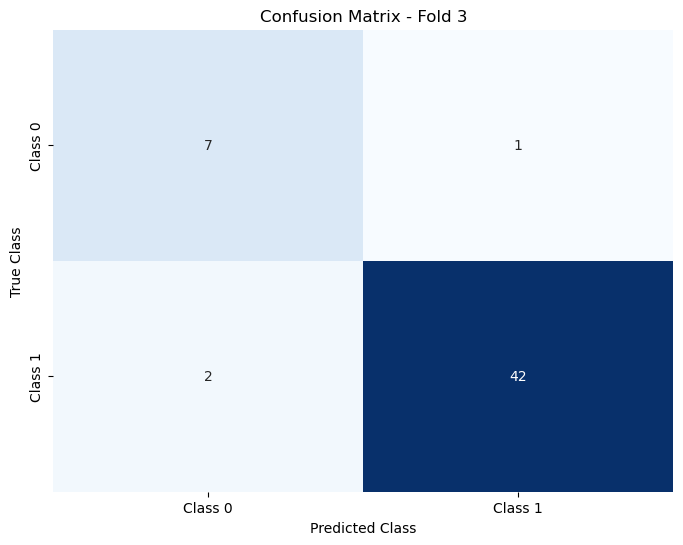


Fold 2
2/2 [==============================] - 0s 3ms/step
Accuracy for Fold 4: 0.7885


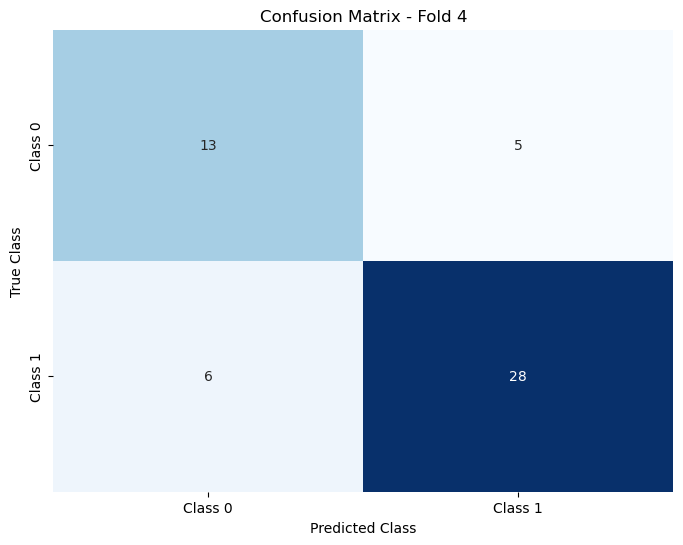


K-Fold Cross-Validation Results:
Fold 1: Accuracy = 0.9231
Fold 2: Accuracy = 0.9423
Fold 3: Accuracy = 0.7885

Average Accuracy: 0.8846


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
run_cross_validation(X_train, y_train, kf_splits=3, epochs=100, batch_size=5)

**Breast Cancer Dataset**

In [62]:
file_path = "breast+cancer/breast-cancer.data"
column_names = ['class', 'age', 'menopause', 'tumor size', 'inv nodes', 'node capes', 'deg malig', 'breast', 'breast quad', 'irradiat'] 
print(len(column_names))
breast_data =  pd.read_csv(file_path, delimiter=",", header=None, names=column_names)

class_map = {'no-recurrence-events': 0, 'recurrence-events' : 1} #0 is healthy

age_mapping = {
    '10-19': 15,
    '20-29': 25,
    '30-39': 35,
    '40-49': 45,
    '50-59': 55,
    '60-69': 65,
    '70-79': 75,
    '80-89': 85,
    '90-99': 95
}
meno_mapping = {
    'lt40' : 0,
    'ge40' : 1,
    'premeno' : 2
}
size_mapping = {
'0-4' : 2,
'5-9' : 7,
'10-14' : 12,
'15-19' : 17,
'20-24' : 22,
'25-29' : 27,
'30-34' : 32,
'35-39' : 37,
'40-44' : 42,
'45-49' : 47,
'50-54' : 52,
'55-59' : 57
}

node_mapping = {
'0-2' : 2,
'3-5' : 5,
'6-8' : 8,
'9-11' : 11,
'12-14' : 14,
'15-17' : 17,
'18-20' : 20,
'21-23' : 23,
'24-26' : 26,
'27-29' : 29,
'30-32' : 32,
'33-35' : 35,
'36-39' : 39
}
y_n_map = {'yes': 0, 'no':1}
side_map = {'left': 0, 'right':1}
quad_map = {
'left_up' : 0,
'left_low' : 1,
'right_up' : 2,
'right_low' : 3,
'central' : 4,
}
breast_data['class'] = breast_data['class'].replace(class_map)
breast_data['age'] = breast_data['age'].replace(age_mapping)
breast_data['menopause'] = breast_data['menopause'].replace(meno_mapping)
breast_data['tumor size'] = breast_data['tumor size'].replace(size_mapping)
breast_data['inv nodes'] = breast_data['inv nodes'].replace(node_mapping)
breast_data['node capes'] = breast_data['node capes'].replace(y_n_map)
breast_data['breast'] = breast_data['breast'].replace(side_map)
breast_data['breast quad'] = breast_data['breast quad'].replace(quad_map)
breast_data['irradiat'] = breast_data['irradiat'].replace(y_n_map)

breast_data['node capes'] = pd.to_numeric(breast_data['node capes'], errors='coerce')
breast_data['breast quad'] = pd.to_numeric(breast_data['breast quad'], errors='coerce')

breast_data.dropna(inplace=True) #Dropped 9 entries, as Nan
# breast_data.info()

shuffled_breast_data = breast_data.sample(frac=1)
shuffled_breast_data.reset_index(inplace = True, drop = True)

Class = ['class']
feat_list = list(breast_data.columns)
feat_list.remove('class')
Features = feat_list

X = shuffled_breast_data[Features].values
Y = shuffled_breast_data[Class].values

PredictorScaler=StandardScaler()
PredictorScalerFit=PredictorScaler.fit(X)

X=PredictorScalerFit.transform(X)


10


/var/folders/1r/9xqq4jbj1bxc93bgtfzf_0w40000gn/T/ipykernel_93452/2172720717.py:63: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  breast_data['class'] = breast_data['class'].replace(class_map)
/var/folders/1r/9xqq4jbj1bxc93bgtfzf_0w40000gn/T/ipykernel_93452/2172720717.py:64: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  breast_data['age'] = breast_data['age'].replace(age_mapping)
/var/folders/1r/9xqq4jbj1bxc93bgtfzf_0w40000gn/T/ipykernel_93452/2172720717.py:65: FutureWarning: Downcasting behavior in `replace` is deprecated and will

In [63]:
def run_cross_validation(X, Y, kf_splits=3, epochs=100, batch_size=5):
    def create_model(input_dim):
        model = Sequential()
        model.add(Dense(units=64, input_dim=input_dim, kernel_initializer='uniform', activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
        model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
        model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
        return model

    # Initialize K-Fold cross-validation
    kf = KFold(n_splits=kf_splits, shuffle=True, random_state=42)
    
    fold_results = []
    
    # Perform K-Fold cross-validation
    for fold, (train_index, test_index) in enumerate(kf.split(X)):
        print(f"\nFold {fold + 1}")

        # Splitting data into training and testing sets
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]

        # Train the model
        classifier = create_model(X.shape[1])
        classifier.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0)

        # Predict on test data
        predictions = classifier.predict(X_test)
        predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy
        accuracy = np.mean(predictions == y_test)
        fold_results.append(accuracy)

        print(f"Accuracy for Fold {fold + 1}: {accuracy:.4f}")

        # Confusion Matrix
        cm = confusion_matrix(y_test, predictions)
        print(f"Confusion Matrix for Fold {fold + 1}:\n{cm}")
        print(classification_report(y_test, predictions))

        # Plot Confusion Matrix
        class_names = ['Class 0', 'Class 1']  # Adjust class names as per your dataset
        df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
        plt.figure(figsize=(8, 6))
        sn.heatmap(df_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.xlabel("Predicted Class")
        plt.ylabel("True Class")
        plt.title(f"Confusion Matrix - Fold {fold + 1}")
        plt.show()

    # Summary of results after all folds
    print("\nK-Fold Cross-Validation Results:")
    for fold, accuracy in enumerate(fold_results, 1):
        print(f"Fold {fold}: Accuracy = {accuracy:.4f}")

    print(f"\nAverage Accuracy: {np.mean(fold_results):.4f}")


20/80


Fold 1
1/1 [==============================] - 0s 82ms/step
Accuracy for Fold 1: 0.6316
Confusion Matrix for Fold 1:
[[10  5]
 [ 2  2]]
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.29      0.50      0.36         4

    accuracy                           0.63        19
   macro avg       0.56      0.58      0.55        19
weighted avg       0.72      0.63      0.66        19



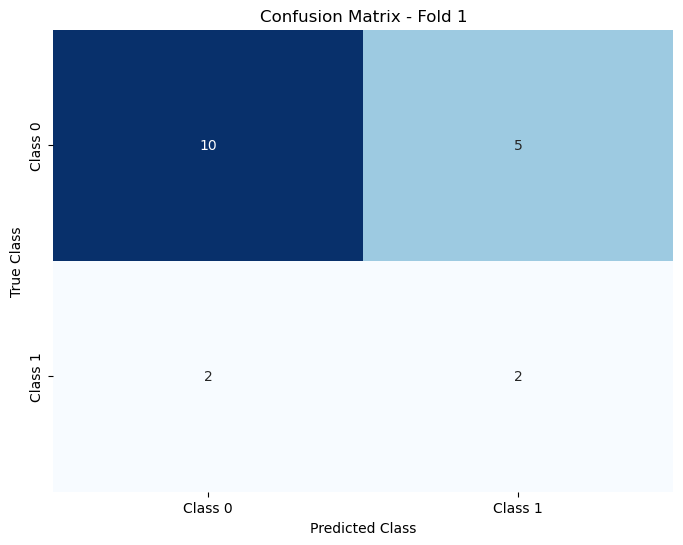


Fold 2
1/1 [==============================] - 0s 75ms/step
Accuracy for Fold 2: 0.6111
Confusion Matrix for Fold 2:
[[9 3]
 [4 2]]
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.40      0.33      0.36         6

    accuracy                           0.61        18
   macro avg       0.55      0.54      0.54        18
weighted avg       0.59      0.61      0.60        18



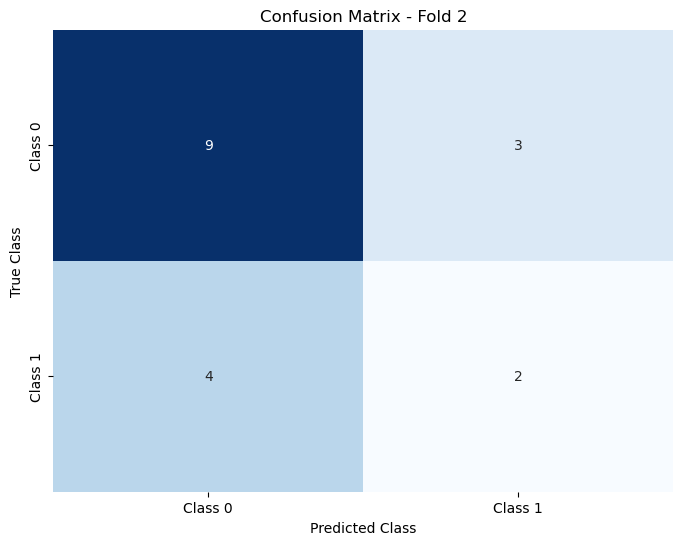


Fold 3
1/1 [==============================] - 0s 76ms/step
Accuracy for Fold 3: 0.6111
Confusion Matrix for Fold 3:
[[11  1]
 [ 6  0]]
              precision    recall  f1-score   support

           0       0.65      0.92      0.76        12
           1       0.00      0.00      0.00         6

    accuracy                           0.61        18
   macro avg       0.32      0.46      0.38        18
weighted avg       0.43      0.61      0.51        18



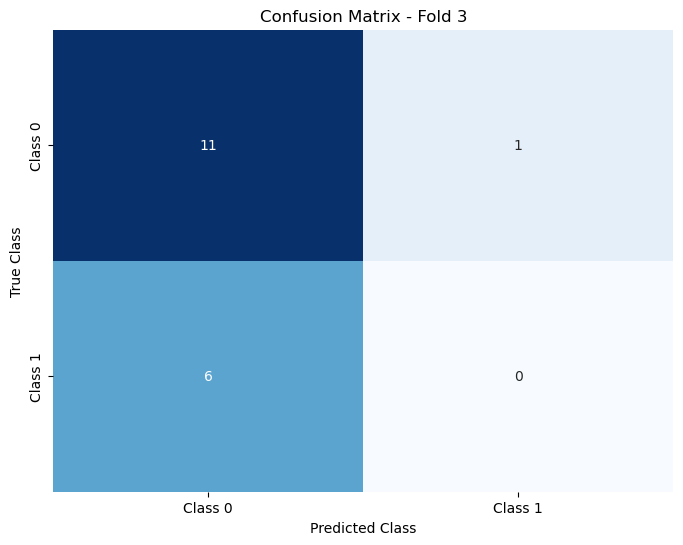


K-Fold Cross-Validation Results:
Fold 1: Accuracy = 0.6316
Fold 2: Accuracy = 0.6111
Fold 3: Accuracy = 0.6111

Average Accuracy: 0.6179


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)
run_cross_validation(X_train, y_train, kf_splits=3, epochs=100, batch_size=5)

50/50


Fold 1
2/2 [==============================] - 0s 3ms/step
Accuracy for Fold 1: 0.6522
Confusion Matrix for Fold 1:
[[23  4]
 [12  7]]
              precision    recall  f1-score   support

           0       0.66      0.85      0.74        27
           1       0.64      0.37      0.47        19

    accuracy                           0.65        46
   macro avg       0.65      0.61      0.60        46
weighted avg       0.65      0.65      0.63        46



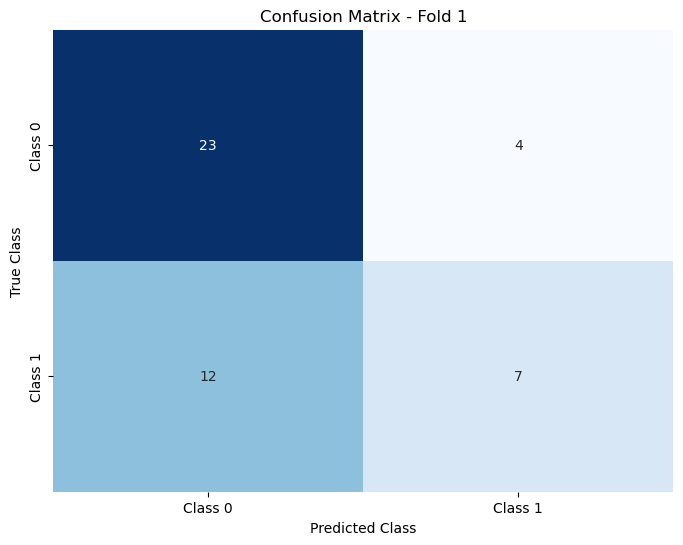


Fold 2
2/2 [==============================] - 0s 2ms/step
Accuracy for Fold 2: 0.7174
Confusion Matrix for Fold 2:
[[30  5]
 [ 8  3]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        35
           1       0.38      0.27      0.32        11

    accuracy                           0.72        46
   macro avg       0.58      0.56      0.57        46
weighted avg       0.69      0.72      0.70        46



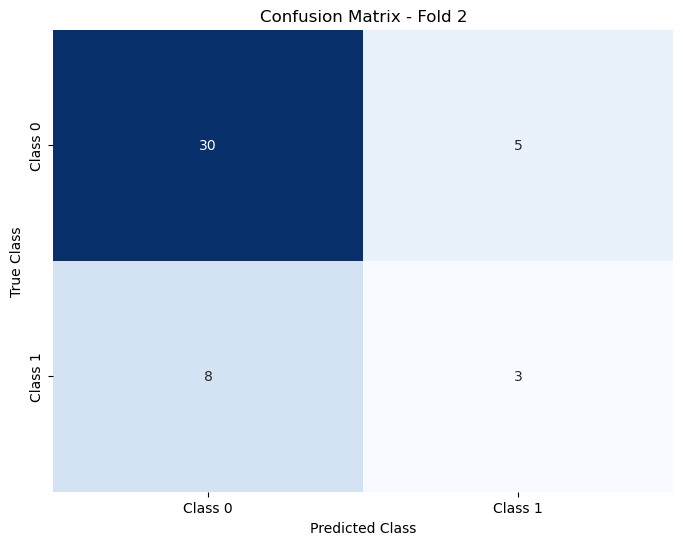


Fold 3
2/2 [==============================] - 0s 3ms/step
Accuracy for Fold 3: 0.7391
Confusion Matrix for Fold 3:
[[29  2]
 [10  5]]
              precision    recall  f1-score   support

           0       0.74      0.94      0.83        31
           1       0.71      0.33      0.45        15

    accuracy                           0.74        46
   macro avg       0.73      0.63      0.64        46
weighted avg       0.73      0.74      0.71        46



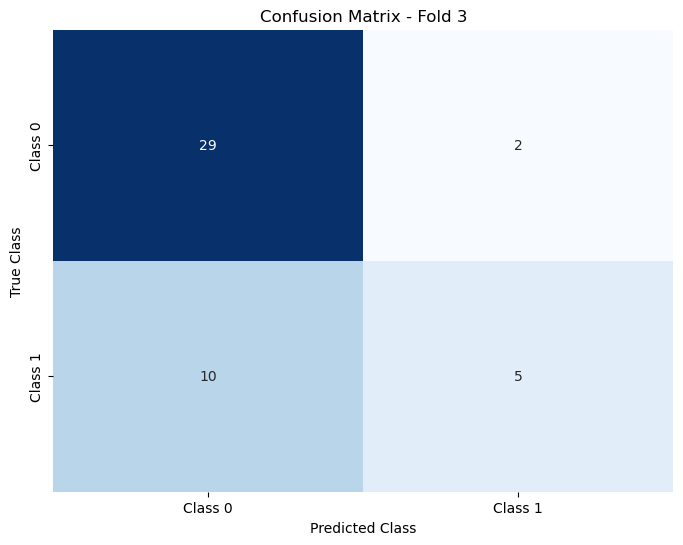


K-Fold Cross-Validation Results:
Fold 1: Accuracy = 0.6522
Fold 2: Accuracy = 0.7174
Fold 3: Accuracy = 0.7391

Average Accuracy: 0.7029


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
run_cross_validation(X_train, y_train, kf_splits=3, epochs=100, batch_size=5)

80/20


Fold 1
3/3 [==============================] - 0s 2ms/step
Accuracy for Fold 1: 0.6892
Confusion Matrix for Fold 1:
[[38  7]
 [16 13]]
              precision    recall  f1-score   support

           0       0.70      0.84      0.77        45
           1       0.65      0.45      0.53        29

    accuracy                           0.69        74
   macro avg       0.68      0.65      0.65        74
weighted avg       0.68      0.69      0.67        74



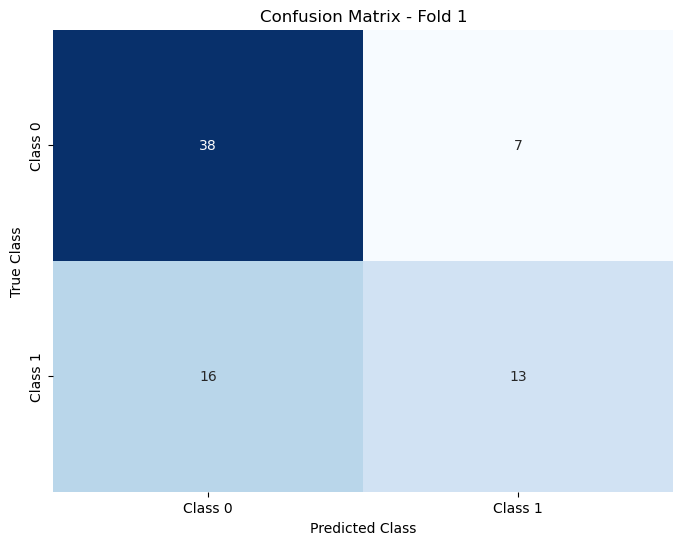


Fold 2
3/3 [==============================] - 0s 2ms/step
Accuracy for Fold 2: 0.6892
Confusion Matrix for Fold 2:
[[41 10]
 [13 10]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78        51
           1       0.50      0.43      0.47        23

    accuracy                           0.69        74
   macro avg       0.63      0.62      0.62        74
weighted avg       0.68      0.69      0.68        74



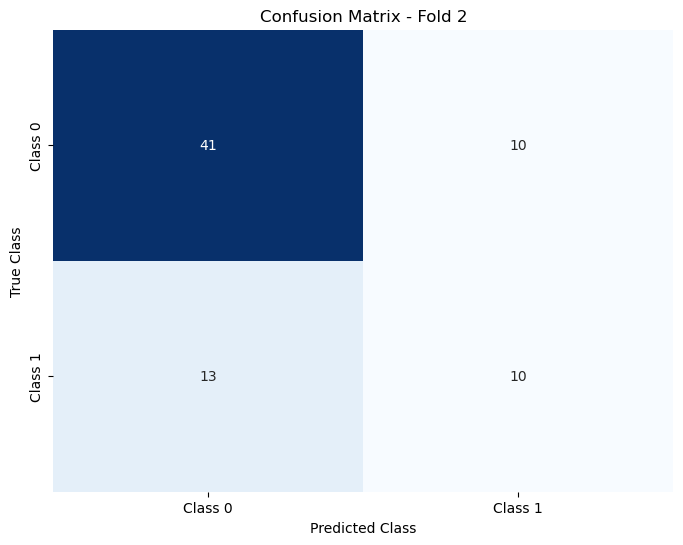


Fold 3
3/3 [==============================] - 0s 2ms/step
Accuracy for Fold 3: 0.7534
Confusion Matrix for Fold 3:
[[44 10]
 [ 8 11]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        54
           1       0.52      0.58      0.55        19

    accuracy                           0.75        73
   macro avg       0.68      0.70      0.69        73
weighted avg       0.76      0.75      0.76        73



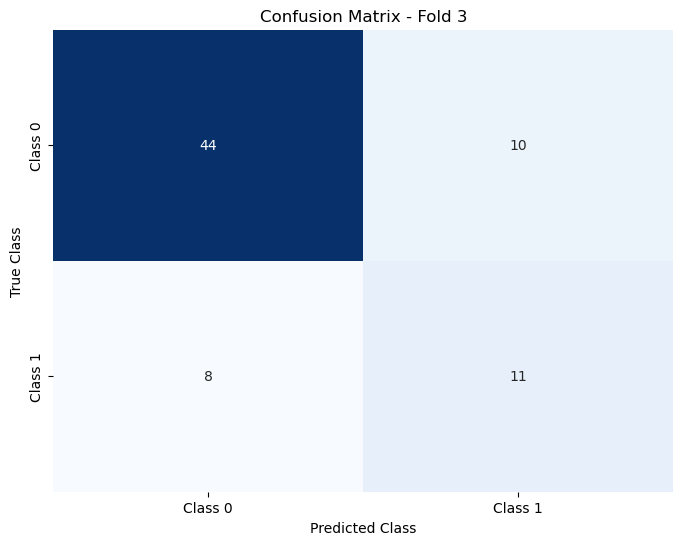


K-Fold Cross-Validation Results:
Fold 1: Accuracy = 0.6892
Fold 2: Accuracy = 0.6892
Fold 3: Accuracy = 0.7534

Average Accuracy: 0.7106


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
run_cross_validation(X_train, y_train, kf_splits=3, epochs=100, batch_size=5)